# Introduction

A international company would like to market products to customers that develop from home and would like to know what the probability of someone working remotely is depending on the country that they are from. During the Covid-19 Pandemic the concept of remote working or working from home was not as common as it became during the pandemic. How common was it? Was this a global trend or was it more common in North America?
The study takes the results from the Stack Overflow survey and breaks it down per 10 countries from 5 different continents.

# Question 1 

Before the Covid-19 Pandemic, the concept of remote working was not as common as it became during the pandemic. How common was it? 

Business Understanding: First we import the necessary libraries and import the file to be used as the data. The first file is the survey results from the Stack Overflow survey. 

To understand the data better,  we will accept that, if an employee works more than half of their time remotely, it will be considered as remote work and if less than half, the employee will be considered as not working remotely.

To clean and prepare the data, a new column will be created in the dataframe that will be updated from another column. 

In [222]:
#We import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

'''
    INPUT - An Excel spreadsheet of the responses from the Stack overflow survey
            
    OUTPUT - df - pandas dataframe of the responses from the Stack overflow survey
             df_emp_filt - A filtered dataframe that contains respondents that are employed or freelance
    '''
#Create a dataframe, one main table from the Excel sheet
df = pd.read_excel('C:\\Users\\vdwaltjl\\OneDrive - Vodafone Group\\General\\Training and Studies\\Udacity Data Science\\survey-results-public_short.xlsx')

Now that we have our data in a dataframe, we have to clean it. The first step is to remove the respondents that are not employed or retired. We don't filter out the N/A responses, seeing that there are respondents in the group that are employed, and removing them could make the results inacurate.

In [224]:
df_emp_filt = df[df.EmploymentStatus.isin(["Independent contractor, freelancer, or self-employed","Employed full-time","Employed full-time"])]

The next step is to divide the respondents into two:
    1) 'Half and more' is in one category, and
    2)  the rest in 'Less than half'
NA will be counted as less than half, seeing that the question is: "How often do you work from home or remotely?". A N/A response will be accepted as no remote working at all and placed in the second category.

We do this split by creating a new column based on a condition. 'Half and more' is in one category and the rest in 'Less than half'

We create an empty list to which we append with the new descriptions:

In [225]:
'''
    INPUT - df - pandas dataframe with the responses from the Stack overflow survey
            column_name - HomeRemote - The respons e to the question: "How often do you work from home or remotely?""
    OUTPUT - 
            Remote_percent - the name of the new column with the strings that divides 
            the 'HomeRemote'responses into two categories
    '''
Remote_perc = []
for percentage in df_emp_filt['HomeRemote']:
    if percentage in ("About half the time",
        "All or almost all the time (I'm full-time remote)",
        "More than half, but not all, the time") : Remote_perc.append('Half and more')
        
    else:   Remote_perc.append ('Less than half')

The next step is to update the new column 'Remote_percent' with the new values.

In [238]:
df_emp_filt['Remote_percent'] = Remote_perc

We run the analysis on the numbers with the 'value_counts' function and express it as a percentage:

In [228]:
df_emp_filt['Remote_percent'].value_counts(normalize=True).mul(100)

Less than half    81.203934
Half and more     18.796066
Name: Remote_percent, dtype: float64

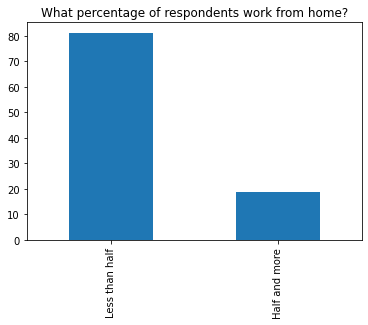

In [229]:
df_emp_filt['Remote_percent'].value_counts(normalize=True).mul(100).plot(kind='bar');
plt.title("What percentage of respondents work from home?");

Evaluation: It is clear that, prior to Covid-19, the percentage of respondents are less than 20%, 18.8% exactly, that work half of their day or more from home.

# Question 2 

Does the country or continent's culture have an impact on the percentage of respondents that work from home. Was this a global trend or was it more common in North America?

In order to clean the data we will use only the 10 countries with the highest amount of repondents which is a sample of roughly 60% of the respondents.

Firstly, we determine the name of the top 10 countries with the highest amount of repondents, and filter them out of the main dataframe.

In [230]:
'''
    INPUT - df - pandas dataframe with the responses from the Stack overflow survey
            a list of countries that represent roughly 60% of the respondents
    OUTPUT - 
            A table with two columns that contains the percentages of the totals of the 2 categories in a specific country
    '''
filt = df_emp_filt[df_emp_filt.Country.isin(['United States','India','United Kingdom','China','Brazil','Germany','Canada','Australia','Poland'])]

We use the Pandas crosstab function to group and aggregate the data and calculate the percentage of respondants that work more than half of their time remotely from home. 

In [232]:
Table=pd.crosstab(index= filt.Country, 
            columns= filt.Remote_percent, 
            values= filt.Country, 
            aggfunc = len, 
            margins=True,
            margins_name='Total',
            normalize= 'index').mul(100)
Table

Remote_percent,Half and more,Less than half
Country,,
Australia,18.243243,81.756757
Brazil,21.794872,78.205128
Canada,15.754561,84.245439
China,14.516129,85.483871
Germany,11.677215,88.322785
India,20.670391,79.329609
Poland,19.119119,80.880881
United Kingdom,13.580247,86.419753
United States,19.238414,80.761586


In [242]:
Table.dtypes

Remote_percent
Half and more     float64
Less than half    float64
dtype: object

In [233]:
Remote=Table["Half and more"]# We choose the column that works remotely or from home 50% of the day or more

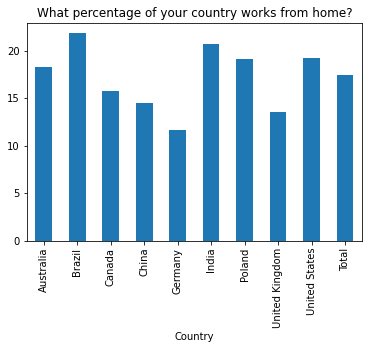

In [234]:
Remote.plot(kind='bar')
plt.title("What percentage of your country works from home?");

Evaluation: If we analize the data we notice that United States, Brazil, India and Poland are above the total for this Top 10 group of 17.4% and the total for the full group of countries which is 18.4%.

The four countries that are above the average are on 4 different continents. Australia lies between the two totals of the group of 10 and the total group. The 5 that lie below are from the same continents as the 4 above the average.

One can therefore safely say that there seems to be no relation between the continent that a respondent is from, although it seems if you combine United States and Canada it might be higher than the average of the 3 European countries in the study. This takes us to our next question:

# Question 3

Are the countries in Western Europe, Sweden, France, Italy, etc. less likely than a world average to allow workers to work remotely or from home?

In [235]:
'''
    INPUT - df - pandas dataframe with the responses from the Stack overflow survey
            a list of countries that representroughly 60% of the respondents
    OUTPUT - 
            A table with two columns that contains the percentages of the totals of the 2 categories within Western European countries
'''
filt2 = df_emp_filt[df_emp_filt.Country.isin(["Austria","Belgium","Denmark","Finland","France","Germany","Italy","Luxembourg","Netherlands","Norway","Portugal","Spain","Sweden","United Kingdom"])]

In [236]:
Table2=pd.crosstab(index= filt2.Country, 
            columns= filt2.Remote_percent, 
            values= filt2.Country, 
            aggfunc = len, 
            margins=True,
            margins_name='Total',
            normalize= 'index').mul(100)
Table2

Remote_percent,Half and more,Less than half
Country,,
Austria,14.782609,85.217391
Belgium,8.430233,91.569767
Denmark,10.788382,89.211618
Finland,21.428571,78.571429
France,15.255474,84.744526
Germany,11.677215,88.322785
Italy,21.690590,78.309410
Luxembourg,11.538462,88.461538
Netherlands,13.249211,86.750789


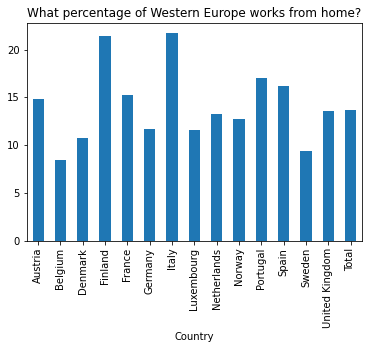

In [239]:
Remote2=Table2["Half and more"]
Remote2.plot(kind='bar')
plt.title("What percentage of Western Europe works from home?");

Evaluation: Althought the average of the Western European countries is less than the worldwide and Top 10 averages, one can clearly notice that some, e.g. Italy and Finland are well above the averages. It is therefore safe to say that Western Europe cannot be used to predict if less than average remote work is done. What may be possible to say that someone from Sweden is less likely to work from home, or remotely, than someone from Finland.

It will be interesting to see after Covid-19, how the percentages will be affected.
